# Package testing

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

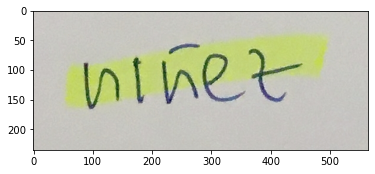

In [2]:
test = "../data-sources/spanish-words/w07_rgb_28.png"
image = imload(test)
plt.imshow(image)

## `preprocessing` pkg

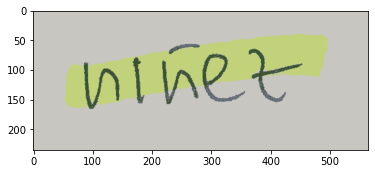

In [57]:
from preproc import Quantize

quantized_image = Quantize.reduce_palette(image, 4)
plt.imshow(quantized_image)

Wall time: 2.3 s


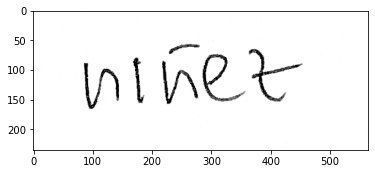

In [3]:
%%time
from preproc import Binarize

bin_image = Binarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

Wall time: 35.9 ms


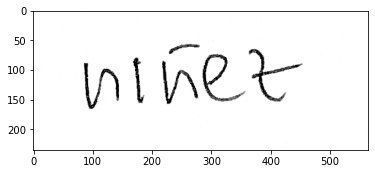

In [4]:
%%time
from preproc import Binarize

bin_image = Binarize.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

Wall time: 1.21 s


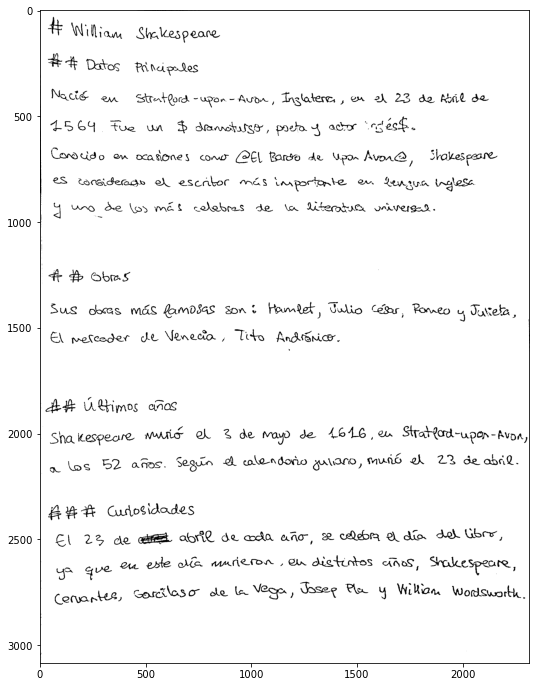

In [5]:
%%time
from preproc import Binarize

test = "../data-sources/spanish-words-originals/test3.jpg"
image = imload(test)

output_test = f"{test[:-4]}_bin.jpg"
bin_image = Binarize.threshold_sauvola(image, window_sz=23)
cv2.imwrite(output_test, bin_image)

plt.figure(figsize=(12,12))
plt.imshow(bin_image, cmap="gray")

Wall time: 298 ms


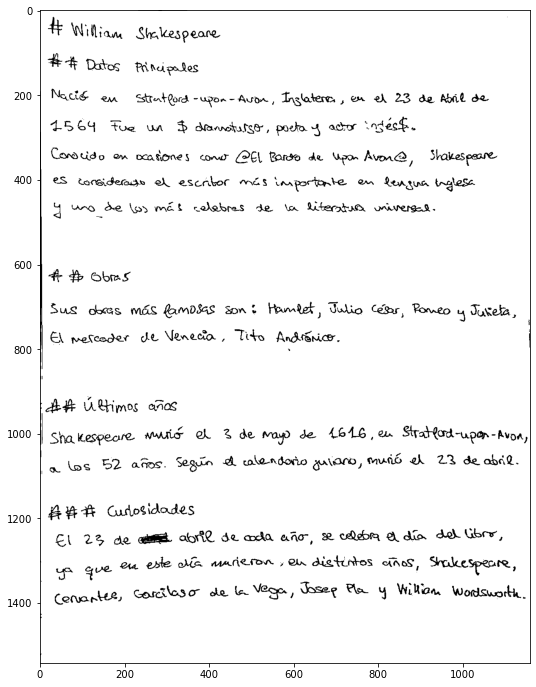

In [6]:
%%time
from preproc import Binarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

output_test = f"{test[:-4]}_bin.jpg"
bin_image = Binarize.threshold_sauvola(image, window_sz=23)
cv2.imwrite(output_test, bin_image)

plt.figure(figsize=(12,12))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import Binarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq_bin.jpg"
image = imload(test)

output_test = f"{test[:-4]}_bin_illum.jpg"
bin_image = Binarize.illumination_compensation(image)
# cv2.imwrite(output_test, bin_image)

plt.figure(figsize=(12,12))
plt.imshow(bin_image, cmap="gray")

Could we compensate illumination for a RGB images as well?

In [66]:
bin_image2 = np.expand_dims(bin_image, axis=-1)
bin_image2.shape

(235, 565, 1)

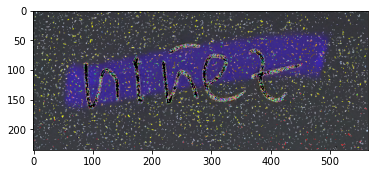

In [68]:
new_img = np.multiply(image, bin_image2)
plt.imshow(new_img)

In [2]:
from preproc import ColorGroup

new_color = np.array([[182, 94, 101]])

model = ColorGroup()
model.predict(new_color)

'pink'

## `languages` pkg

In [2]:
from languages import LanguageTransformer, HTMLMinidownColorListener

LanguageTransformer(
    listener=HTMLMinidownColorListener,
    fpath="languages/examples/two.hmd",
    output_fpath="languages/tmp/hello.html"
)

In [4]:
from IPython.display import IFrame

IFrame(src='./languages/tmp/hello.html', width=700, height=300)